In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the movie file which contains the movie name along with its genre
movie_df = pd.read_csv("movies.csv")
movie_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_df.shape

(9742, 3)

In [ ]:
# Read the rating file which contains the rating corresponding to movieID and userID along with the timestamp.
rating_df = pd.read_csv("ratings.csv")
rating_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
rating_df.shape

(100836, 4)

In [ ]:
#Merge the two datasets into one dataframe
df = pd.merge(movie_df, rating_df, on='MovieID')
df.drop('Timestamp', axis = 1, inplace=True)
df.drop('Genres', axis = 1, inplace=True)
df.head()

,MovieID,Title,UserID,Rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [ ]:
# Drop any rows in the dataframe where  the ‘title’ column has NA (Not Available) values as we can't do anything with
df = df.dropna(axis = 0, subset = ['Title'])
df.head()

,MovieID,Title,UserID,Rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [ ]:
# Group the DataFrame by 'title' and count the number of 'rating' for each group
grouped_df = df.groupby(by = ['Title'])['Rating'].count()

# DataFrame movie_ratingCount that contains each unique movie title and the total number of ratings it has received
reset_df = grouped_df.reset_index()
renamed_df = reset_df.rename(columns = {'Rating': 'totalRatingCount'})
movie_ratingCount = renamed_df[['Title', 'totalRatingCount']]
movie_ratingCount.head()

,Title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [ ]:
# Combine the rating data with the total rating count data
rating_with_totalRatingCount = df.merge(movie_ratingCount, left_on = 'Title', right_on = 'Title', how = 'left')
rating_with_totalRatingCount.head()

,MovieID,Title,UserID,Rating,totalRatingCount
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


In [ ]:
# Drop duplicate rows based on 'movieId' column
unique_movies_df = rating_with_totalRatingCount.drop_duplicates(subset='MovieID')

# Display the first few rows of the new DataFrame
unique_movies_df.head()

,MovieID,Title,UserID,Rating,totalRatingCount
0,1,Toy Story (1995),1,4.0,215
215,2,Jumanji (1995),6,4.0,110
325,3,Grumpier Old Men (1995),1,4.0,52
377,4,Waiting to Exhale (1995),6,3.0,7
384,5,Father of the Bride Part II (1995),6,5.0,49


In [ ]:
# Rating count for the movies
rating_count = pd.DataFrame(rating_df.groupby('Rating').size(),columns=['count'])
print('Total ratings count :')
print(rating_count, '\n')

Total ratings count :
        count
Rating       
0.5      1370
1.0      2811
1.5      1791
2.0      7551
2.5      5550
3.0     20047
3.5     13136
4.0     26818
4.5      8551
5.0     13211 



In [ ]:
# Calculate the unique users in the dataset.
unique_users = rating_df.UserID.unique()
print("Total unique user:", len(unique_users))

Total unique user: 610


In [ ]:
# Calculate the unique movies in the dataset
unique_movies = rating_df.MovieID.unique()
print("Total unique movies:", len(unique_movies))

Total unique movies: 9724


Let us check how many total number of ratings should be there if all users rated the each of the movies

In [ ]:
total_expected_ratings = len(unique_users) * len(unique_movies)
print("Total expected ratings:", total_expected_ratings)

ratings_present = rating_df.shape[0]
print("Total rating present:", ratings_present)

ratings_absent = total_expected_ratings - ratings_present
print("Number of movies which lack ratings:" , ratings_absent)


Total expected ratings: 5931640
Total rating present: 100836
Number of movies which lack ratings: 5830804


Let us do data visulisation to see the distribution of movie rating for the above values.

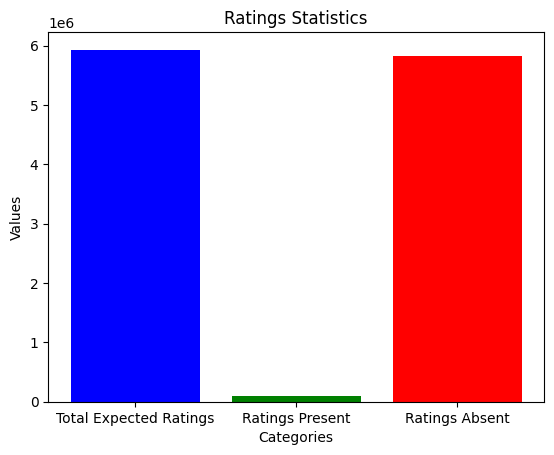

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Total Expected Ratings', 'Ratings Present', 'Ratings Absent']
values = [total_expected_ratings, ratings_present, ratings_absent]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(labels, values, color=['blue', 'green', 'red'])

# Set the title and labels
ax.set_title('Ratings Statistics')
ax.set_xlabel('Categories')
ax.set_ylabel('Values')

# Show the plot
plt.show()

It is clear from the above stats that most of the movies are not rated by the users.
So we may need to clean the dataset by removing those movies which are rated very less number of times.

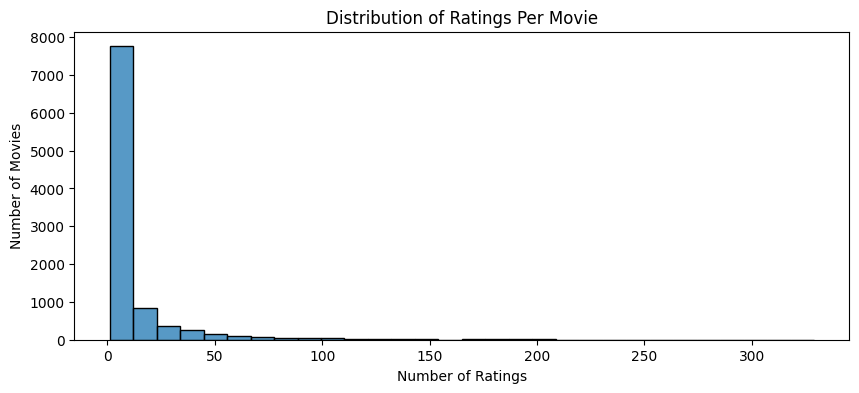

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of ratings for each movie
ratings_per_movie = rating_df.groupby('MovieID').size()

# Plot a histogram
plt.figure(figsize=(10,4))
plt.title('Distribution of Ratings Per Movie')
sns.histplot(ratings_per_movie, bins=30)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

Upon analyzing the distribution of ratings in the dataset, I observed that many movies received a relatively small number of ratings, and setting a minimum threshold becomes crucial for statistical significance.

Based on the above dataset analysis, the threshold value of 25 is considered to filter out the non-popular movies. With this, I aimed to include movies that have a more substantial user engagement and considering the sparsity of the user-item matrix, a threshold of 25 may help to strike a balance.

In [ ]:
# No of times each of the movies has been rated by the users
freq_movie = pd.DataFrame(df.groupby('MovieID').size(),columns=['count'])
print('Frequency count of each movie rated : ')
freq_movie


Frequency count of each movie rated : 


,count
MovieID,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [ ]:
popularity_threshold_rating = 25
rating_popular_movie = freq_movie.query('count >= @popularity_threshold_rating')
rating_popular_movie.shape

(1050, 1)

In [ ]:
popular_moviesId = list(set(freq_movie.query('count>=@popularity_threshold_rating').index))

# Ratings after we drop the non popular movies
ratings_for_popular_movies = df[df.MovieID.isin(popular_moviesId)]
# Shape of the ratings with popular movies
len(ratings_for_popular_movies)

62518

In [ ]:
# No of movies rated by the each user.
freq_user = pd.DataFrame(df.groupby('UserID').size(),columns=['count'])
freq_user

,count
UserID,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


In [ ]:
# The user who rated more than 25 movies is taken into consideration
# Above we calculated the Total unique user: 39871

popularity_threshold_user = 25
user_active = list(set(freq_user.query('count>=@popularity_threshold_user').index))
len(user_active)

547

In [ ]:
# Let us check the ratings with popular movies
# Above we calculated for popular movies to be : 5709935
ratings_for_popular_movies_with_active_user = ratings_for_popular_movies[ratings_for_popular_movies.UserID.isin(user_active)]
len(ratings_for_popular_movies_with_active_user)


61433

K-Nearest Neighbour (K-NN) Model:

In [ ]:
# Reducing the sparsity by removing non popular movies and non active user from the dataset

sparsity_with_modified_ratings = ((len(user_active) * len(popular_moviesId)) - ratings_for_popular_movies_with_active_user.shape[0]) / (len(user_active) * len(popular_moviesId))
print(sparsity_with_modified_ratings)

sparsity = ((len(unique_users) * len(unique_movies)) - ratings_for_popular_movies.shape[0]) / (len(unique_users) * len(unique_movies))
print(sparsity)

0.8930390876643162
0.9894602504535002


In [ ]:
user_matrix = ratings_for_popular_movies_with_active_user
print(user_matrix.shape)
item_user_matrix = user_matrix.pivot(index='MovieID',columns = 'UserID',values='Rating').fillna(0)
print(item_user_matrix)

(61433, 4)
UserID   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
MovieID                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6        4.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  3.0  4.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
148626   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
152081   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.5  0.0  0.0   
164179   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
166528   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
168252   0.0  0.0

In [ ]:
from scipy.sparse import csr_matrix

# Transform DataFrame to sparse matrix
movie_user_mat_sparse = csr_matrix(item_user_matrix.values)
movie_user_mat_sparse.shape[0]

1050

Let us begin to check the number of dimension of the sparse matrix :

1) By checking the number of columns in sparse matrix.

2) By counting the number of non-zero entries in each column (feature) of the sparse matrix. If we see a large number of non-zero entries, it indicates a higher dimensionality.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = movie_user_mat_sparse.shape[1]
print("Number of features:", num_features)

non_zero_counts = np.diff(movie_user_mat_sparse.indptr)
avg_non_zero_count = np.mean(non_zero_counts)

print("Average non-zero count per feature:", avg_non_zero_count)

Number of features: 547
Average non-zero count per feature: 58.507619047619045


The above result suggests that the data is relatively high-dimensional.

1) Algorithn Design Choice:
brute force algorithm : Since it is suitable for high -dimensional data. So I plan to go forward with brute using moderate number of neighbours.

2) Metric Design Choice:
Euclidean Distance: Since the dataset is relatively high dimensional space, this approach should work well. Also, since i plan to go forward with brute algorithm, the kd-tree metric efficiency gain won't be realised with sparse matrix as they have a different structure and require a different approach for efficient nearest neighbor search.

Also, I used this concept because I am able to relate and understand well.

Use the K-NearestNeighbors algorithm from sklearn.neighbors to fit our sparse matrix for the recommendation model.

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Model
model_knn = NearestNeighbors(metric='euclidean', algorithm='brute', n_neighbors=15, n_jobs=-1)

# model_knn = NearestNeighbors(metric='manhattan', algorithm='brute', n_neighbors=25, n_jobs=-1)

# model_knn = NearestNeighbors(metric='euclidean', algorithm='kd_tree', n_neighbors=25, n_jobs=-1)


In [ ]:
def make_recommendation(model_knn, data, n_recommendations, movie_df, fav_movie):
    # fit the model
    model_knn.fit(data)
    # get input movie index
    print('The movie input :', fav_movie)

    # Find the index of the input movie in the dataframe (case-insensitive and strip extra spaces)
    idx = movie_df.index[movie_df['Title'].str.strip().str.lower() == fav_movie.strip().lower()].tolist()

    if not idx:
        print("Please enter a valid movie name\n")
        return

    print('Recommendation system is starting ...\n')

    idx = idx[0]  # Take the first index if multiple matches

    # Get indices of similar movies
    indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations + 1, return_distance=False)[0]

    # Get movie titles from the indices
    similar_movies = [movie_df.iloc[i]['Title'] for i in indices]

    print(f"Viewer can be recommended with the following movies : \n")
    for movie in similar_movies[1:]:  # Exclude the input movie itself
        print(movie)

    return


In [ ]:
my_favorite = 'Jumanji (1995)	' # 'Toy Story (1995)'
make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    n_recommendations=10,
    movie_df=movie_df,
    fav_movie=my_favorite
)

The movie input : Jumanji (1995)	
Recommendation system is starting ...

Viewer can be recommended with the following movies : 

Pocahontas (1995)
American President, The (1995)
When Night Is Falling (1995)
Young Poisoner's Handbook, The (1995)
What Happened Was... (1994)
City Hall (1996)
Showgirls (1995)
Some Folks Call It a Sling Blade (1993)
In the Bleak Midwinter (1995)
Love & Human Remains (1993)


The model peforms fairly well. Through the pattern of outputs (the movies it is recommending), I noticed that it most of the movies it is recommending are within the same year of release or within a small year gap.

Thus, it may not be the best algortihm to choose. I will try to checking the output by applying SVD on the same dataset.